# Capstone project 2 

## Data Exploration

In [1]:
# Importing visualisation libraries 

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle
import os
import re
from scipy import stats
from random import randint
from datetime import datetime
import plotly.express as px

### Importing CSV file

In [2]:
apple = pd.read_csv("Appledata.csv")

### Checking Size Of Dataset

In [3]:
apple.shape

(1994, 7)

In [4]:
apple

Date        Open        High         Low       Close   Adj Close  \
0     2015-01-16   26.757500   26.895000   26.299999   26.497499   23.851578   
1     2015-01-20   26.959999   27.242500   26.625000   27.180000   24.465933   
2     2015-01-21   27.237499   27.764999   27.067499   27.387501   24.652718   
3     2015-01-22   27.565001   28.117500   27.430000   28.100000   25.294062   
4     2015-01-23   28.075001   28.437500   27.882500   28.245001   25.424583   
...          ...         ...         ...         ...         ...         ...   
1989  2022-12-09  142.339996  145.570007  140.899994  142.160004  142.160004   
1990  2022-12-12  142.699997  144.500000  141.059998  144.490005  144.490005   
1991  2022-12-13  149.500000  149.970001  144.240005  145.470001  145.470001   
1992  2022-12-14  145.350006  146.660004  141.160004  143.210007  143.210007   
1993  2022-12-15  141.110001  141.800003  136.029999  136.500000  136.500000   

         Volume  
0     314053200  
1     199599600  
2     194303600  
3     215185600  
4     185859200  
...         ...  
1989   76069500  
1990   70462700  
1991   93886200  
1992   82291200  
1993   98822900  

[1994 rows x 7 columns]

### Checking Null or Missing Values In Dataset

In [5]:
apple.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking Info of Data

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1994 non-null   object 
 1   Open       1994 non-null   float64
 2   High       1994 non-null   float64
 3   Low        1994 non-null   float64
 4   Close      1994 non-null   float64
 5   Adj Close  1994 non-null   float64
 6   Volume     1994 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.2+ KB


In [7]:
#We can see that all columns are numeric, except 'Date' column which is of object type. We need to convert it to datetime object.

#converting Date column to datetime object

apple['Date']=pd.to_datetime(apple['Date'])

In [8]:
#after conversion

apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### Describing Dataset

In [9]:
apple.describe()

Open         High          Low        Close    Adj Close  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean     72.928725    73.764658    72.120697    72.974867    71.327663   
std      48.914185    49.566897    48.268471    48.939470    49.458508   
min      22.500000    22.917500    22.367500    22.584999    20.914917   
25%      32.500000    32.689375    32.225624    32.496251    29.499118   
50%      48.039999    48.582500    47.774999    48.165001    46.369884   
75%     123.287502   124.797498   121.245001   122.985000   121.681018   
max     182.630005   182.940002   179.119995   182.009995   180.959732   

             Volume  
count  1.994000e+03  
mean   1.315391e+08  
std    6.774176e+07  
min    3.519590e+07  
25%    8.642390e+07  
50%    1.120656e+08  
75%    1.556468e+08  
max    6.488252e+08

### Checking Columns In Dataset 

In [10]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
apple.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2015-01-16  26.757500  26.895000  26.299999  26.497499  23.851578  314053200
1 2015-01-20  26.959999  27.242500  26.625000  27.180000  24.465933  199599600
2 2015-01-21  27.237499  27.764999  27.067499  27.387501  24.652718  194303600
3 2015-01-22  27.565001  28.117500  27.430000  28.100000  25.294062  215185600
4 2015-01-23  28.075001  28.437500  27.882500  28.245001  25.424583  185859200

In [12]:
apple.tail()

Date        Open        High         Low       Close   Adj Close  \
1989 2022-12-09  142.339996  145.570007  140.899994  142.160004  142.160004   
1990 2022-12-12  142.699997  144.500000  141.059998  144.490005  144.490005   
1991 2022-12-13  149.500000  149.970001  144.240005  145.470001  145.470001   
1992 2022-12-14  145.350006  146.660004  141.160004  143.210007  143.210007   
1993 2022-12-15  141.110001  141.800003  136.029999  136.500000  136.500000   

        Volume  
1989  76069500  
1990  70462700  
1991  93886200  
1992  82291200  
1993  98822900

## Data Visualisation

### Top 10 open values with date

In [13]:
top_open=apple.sort_values(by='Open',ascending=False)[['Date','Open']]
top_open.head(10)

#The highest open value was on January 4th 2022. 

Date        Open
1754 2022-01-04  182.630005
1739 2021-12-13  181.119995
1749 2021-12-28  180.160004
1755 2022-01-05  179.610001
1751 2021-12-30  179.470001
1750 2021-12-29  179.330002
1742 2021-12-16  179.279999
1813 2022-03-30  178.550003
1752 2021-12-31  178.089996
1814 2022-03-31  177.839996

In [14]:
top_open.iloc[-1:]

#The lowest closing value was on May 13th 2016.

Date  Open
333 2016-05-13  22.5

### Top 10 closing values with date

In [15]:
top_closing=apple.sort_values(by='Close',ascending=False)[['Date','Close']]
top_closing.head(10)

#The highest closing value was on January 3rd 2022.

Date       Close
1753 2022-01-03  182.009995
1748 2021-12-27  180.330002
1754 2022-01-04  179.699997
1738 2021-12-10  179.449997
1750 2021-12-29  179.380005
1741 2021-12-15  179.300003
1749 2021-12-28  179.289993
1812 2022-03-29  178.960007
1816 2022-04-04  178.440002
1751 2021-12-30  178.199997

In [16]:
top_closing.iloc[-1:]

#Lowest closing date was on May 12th 2016.

Date      Close
332 2016-05-12  22.584999

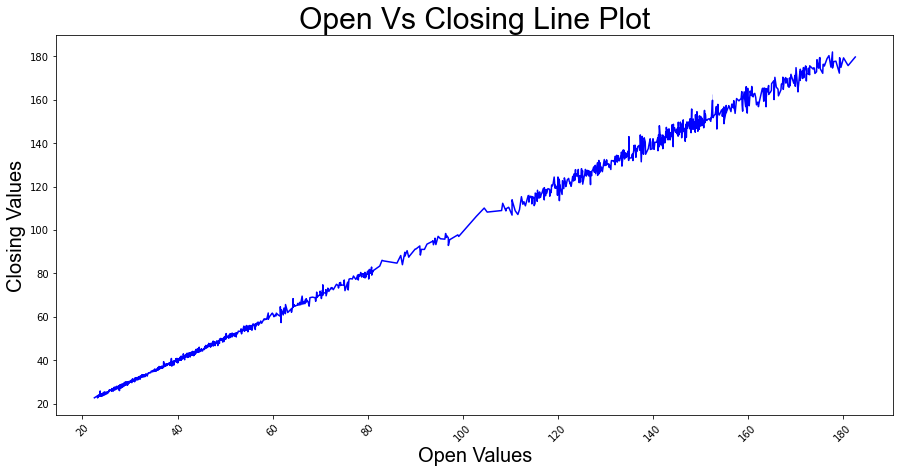

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(data=apple,x='Open',y='Close',color='blue')
plt.title('Open Vs Closing Line Plot',fontdict={'color':'black','size':30,'family':'arial'})
plt.xlabel('Open Values',fontdict={'color':'black','size':20,'family':'arial'})
plt.ylabel('Closing Values',fontdict={'size':20,'color':'black','family':'arial'})
plt.xticks(rotation=45)
plt.show()

## Line graphs of the different variables

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [19]:
apple = apple.set_index("Date")

In [20]:
fig = make_subplots(rows=6, cols=1, 
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price", 
                                    "Lowest Price", "Adjusted Closing Price", "Volume"))

fig.add_trace(go.Scatter(x=apple.index, y=apple["Open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=apple.index, y=apple["Close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=apple.index, y=apple["High"]), row=3, col=1)
fig.add_trace(go.Scatter(x=apple.index, y=apple["Low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=apple.index, y=apple["Adj Close"]), row=5, col=1)
fig.add_trace(go.Scatter(x=apple.index, y=apple["Volume"]), row=6, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

## Seasonal 

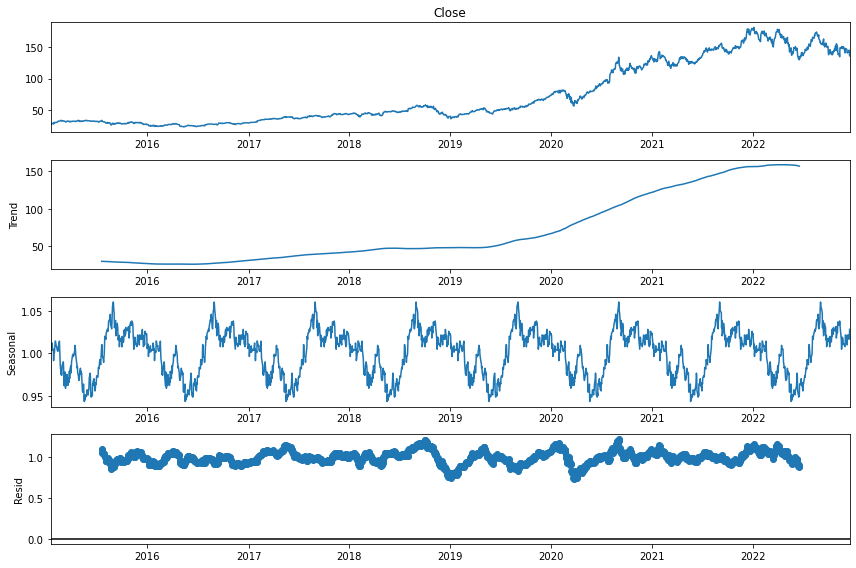

In [21]:
results = seasonal_decompose(apple["Close"], model="multiplicative", period=252)
fig = results.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

## Training data

In [22]:
apple = apple.resample("MS").sum()

In [23]:
apple = apple.reset_index()

size = int(len(apple)*0.8)
train = apple.loc[:size,["Date", "Close"]]
test = apple.loc[size+1:, ["Date", "Close"]]

apple = apple.set_index("Date")
train = train.set_index("Date")
test = test.set_index("Date")

In [24]:
print("Train size:", len(train))
print("Test size:", len(test))
print("Is sum of train and test sizes equal to whole data size:", len(train)+len(test) == apple["Close"].shape[0])

Train size: 77
Test size: 19
Is sum of train and test sizes equal to whole data size: True


In [25]:
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Test Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print('Critial Values:')
    for key, value in result[4].items():
        print(f'\t{key}, {value}')

In [26]:
adf_test(train["Close"])

ADF Test Statistic: 0.7903644602645232
p-value: 0.9914790294913667
Number of Lags: 1
Number of Observations Used: 75
Critial Values:
	1%, -3.520713130074074
	5%, -2.9009249540740742
	10%, -2.5877813777777776


In [27]:
differenced_apple = train["Close"] - train["Close"].shift()

In [28]:
adf_test(differenced_apple.dropna())

ADF Test Statistic: -11.09523867045244
p-value: 3.9890942073637736e-20
Number of Lags: 0
Number of Observations Used: 75
Critial Values:
	1%, -3.520713130074074
	5%, -2.9009249540740742
	10%, -2.5877813777777776


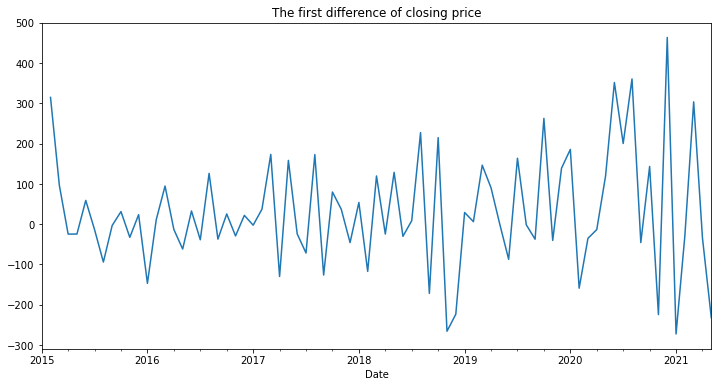

In [29]:
plt.figure(figsize=(12, 6))
differenced_apple.plot()
plt.title("The first difference of closing price")
plt.show()

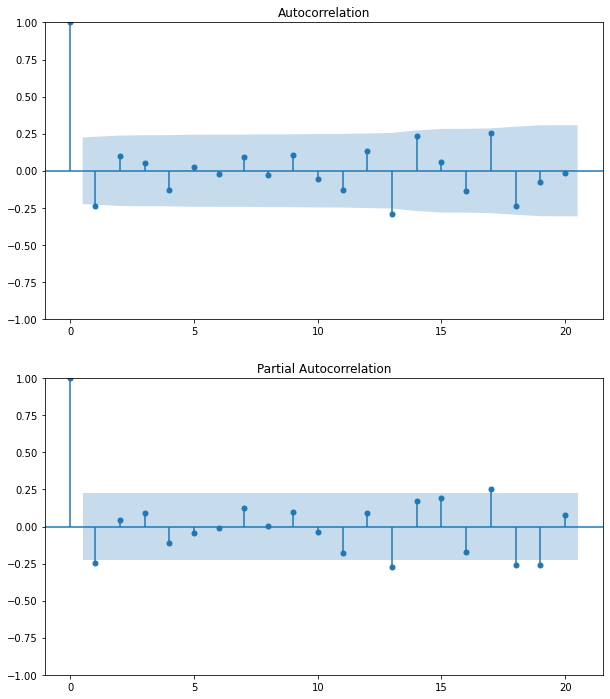

In [30]:
fig, ax = plt.subplots(2 ,1, figsize=(10, 12))
plot_acf(differenced_apple.iloc[1:], lags=20, ax=ax[0])
plot_pacf(differenced_apple.iloc[1:], lags=20, ax=ax[1])
plt.show()

## Model Building for Prediction

In [31]:
x=apple[['Open','High','Low']]
y=apple['Close']

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=41)

In [33]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
rfc=RandomForestRegressor(n_estimators=200)
adb=AdaBoostRegressor(n_estimators=50,learning_rate=1.0)

In [34]:
# traning on adaboost algorithm
adb.fit(xtrain,ytrain)

AdaBoostRegressor()

In [35]:
adb.score(xtrain,ytrain)

0.9981738807720637

In [36]:
adb.score(xtest,ytest)

0.9951102192194136

In [37]:
ypred_adb=adb.predict(xtest)

In [38]:
from sklearn.metrics import mean_squared_error as mse

In [39]:
mse(ypred_adb,ytest)

6470.195144219723

In [40]:
# lets check random forest score
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain)

0.9997393874370947

In [41]:
# random forest model's test score 
rfc.score(xtest,ytest)

0.9981696884677953

In [42]:
ypred_rfc=rfc.predict(xtest)

In [43]:
# mean squared error of adaboost model
mse(ypred_rfc,ytest)

2421.882149624655

### A low value of mse indicate a good model, this means there is very little difference between Actual and predicted values. In this case mse is high.




In [44]:
apple.drop("2022-12-01", axis=0, inplace=True)
apple = apple.reset_index()

In [45]:
sarima = sm.tsa.statespace.SARIMAX(apple.loc[:77, "Close"], order=(1,1,1), seasonal_order=(1,1,1,12))
results = sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42798D+00    |proj g|=  1.38101D-01

At iterate    5    f=  5.40663D+00    |proj g|=  1.56555D-02

At iterate   10    f=  5.40473D+00    |proj g|=  3.21588D-03

At iterate   15    f=  5.40450D+00    |proj g|=  1.42017D-03

At iterate   20    f=  5.40102D+00    |proj g|=  3.15697D-02


 This problem is unconstrained.



At iterate   25    f=  5.39960D+00    |proj g|=  1.10119D-03

At iterate   30    f=  5.39959D+00    |proj g|=  9.09521D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     33      1     0     0   9.095D-06   5.400D+00
  F =   5.3995911105434669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   78
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -421.168
Date:                            Tue, 20 Dec 2022   AIC                            852.336
Time:                                    12:50:30   BIC                            863.208
Sample:                                         0   HQIC                           856.626
                                             - 78                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1920      0.671      0.286      0.775      -1.123       1.507
ma.L1         -0.3605      0.640     -0.564      0.573      -1.614       0.893
ar.S.L12      -0.0316      0.441     -0.072      0.943      -0.895       0.832
ma.S.L12      -0.4470      0.527     -0.848      0.397      -1.480       0.586
sigma2      2.381e+04   4359.534      5.462      0.000    1.53e+04    3.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.79   Prob(JB):                         0.60
Heteroskedasticity (H):               4.56   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
apple["forecast_train"] = results.predict(start=0, end=77)

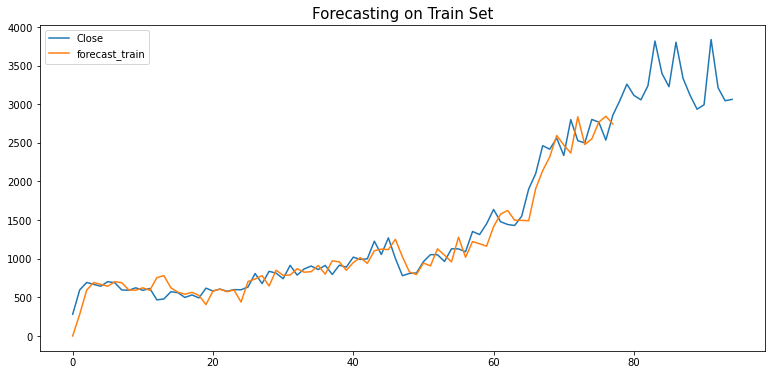

In [48]:
apple[["Close", "forecast_train"]].plot(figsize=(13,6))
plt.title("Forecasting on Train Set", size=15)
plt.show()

In [49]:
apple["forecast_test"] = results.forecast(17)

In [50]:
apple.tail(20)

Date         Open         High          Low        Close  \
75 2021-04-01  2765.120019  2791.139999  2739.770014  2768.070016   
76 2021-05-01  2540.700013  2563.160001  2516.479988  2535.679999   
77 2021-06-01  2848.770020  2874.340025  2832.749999  2859.089991   
78 2021-07-01  3035.980041  3071.300034  3014.309999  3047.930007   
79 2021-08-01  3252.720002  3282.969999  3231.039978  3259.910003   
80 2021-09-01  3129.040009  3149.900009  3091.629974  3114.429993   
81 2021-10-01  3044.399995  3074.789962  3023.049974  3056.839982   
82 2021-11-01  3225.680007  3265.690001  3204.309983  3239.370039   
83 2021-12-01  3809.419999  3863.910050  3767.559997  3818.160003   
84 2022-01-01  3404.030000  3448.959976  3352.790007  3397.229996   
85 2022-02-01  3223.069978  3260.119994  3184.029954  3226.770018   
86 2022-03-01  3790.559983  3844.780015  3747.600008  3802.140014   
87 2022-04-01  3349.580018  3390.370009  3301.660033  3336.419982   
88 2022-05-01  3114.809997  3169.970002  3052.649965  3117.040009   
89 2022-06-01  2938.860001  2980.299986  2900.340028  2935.770037   
90 2022-07-01  2968.729980  3015.319991  2942.830004  2993.409987   
91 2022-08-01  3840.000016  3877.560012  3807.279998  3838.360016   
92 2022-09-01  3218.969999  3261.480024  3168.759995  3213.059969   
93 2022-10-01  3026.220030  3082.810025  2992.089996  3045.279997   
94 2022-11-01  3067.199998  3108.689957  3013.669982  3062.709961   

      Adj Close      Volume  forecast_train  forecast_test  
75  2739.322595  1889857500     2767.726231            NaN  
76  2512.737258  1711934900     2844.234395            NaN  
77  2834.203203  1606590000     2743.461826            NaN  
78  3021.399505  1919035100             NaN    2993.263133  
79  3235.504317  1461542800             NaN    3217.382484  
80  3091.946258  1797835100             NaN    3155.107249  
81  3034.772077  1565079200             NaN    3330.457705  
82  3219.806563  1691029000             NaN    3171.823544  
83  3796.128095  2444766700             NaN    3422.413517  
84  3377.626969  2108446000             NaN    3333.231423  
85  3211.575075  1627516300             NaN    3273.890716  
86  3785.016847  2180800100             NaN    3452.719945  
87  3321.394057  1687795600             NaN    3436.900124  
88  3106.624833  2401040300             NaN    3357.159162  
89  2926.842514  1749099800             NaN    3607.238415  
90  2984.307204  1447125400             NaN    3747.886478  
91  3831.098358  1510239600             NaN    3977.163461  
92  3207.738752  2084722800             NaN    3915.574106  
93  3040.236648  1868139700             NaN    4089.948634  
94  3061.990279  1724691200             NaN    3929.238544

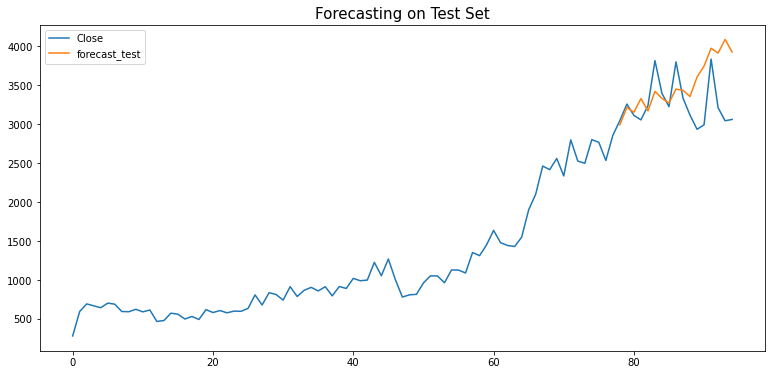

In [51]:
apple[["Close", "forecast_test"]].plot(figsize=(13,6))
plt.title("Forecasting on Test Set", size=15)
plt.show()

In [52]:
apple = apple.set_index("Date")

future_dates=[apple.index[-1]+ pd.DateOffset(months=x) for x in range(1,6)]
future_apple = pd.DataFrame(index=future_dates, columns=apple.columns)
apple_for_forecast = pd.concat([apple, future_apple])

apple_for_forecast = apple_for_forecast.reset_index()
apple_for_forecast.rename(columns={"index": "Date"}, inplace=True)

In [53]:
apple_for_forecast["future_forecast"] = results.predict(start=90, end=95)

In [54]:
apple_for_forecast = apple_for_forecast.set_index("Date")
apple_for_forecast["future_forecast"].tail()

Date
2022-12-01    4186.563825
2023-01-01            NaN
2023-02-01            NaN
2023-03-01            NaN
2023-04-01            NaN
Name: future_forecast, dtype: float64

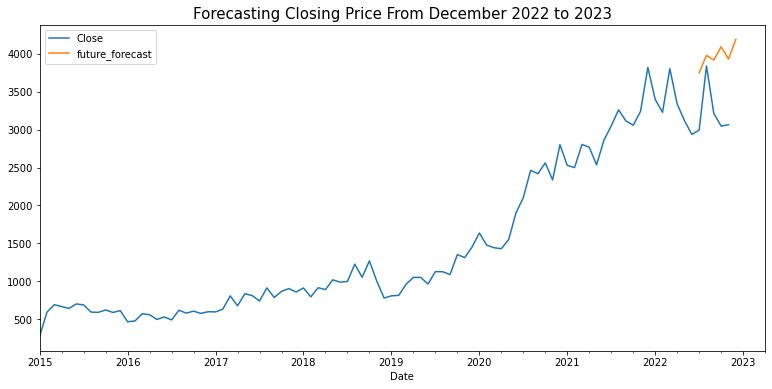

In [55]:
apple_for_forecast[["Close", "future_forecast"]].plot(figsize=(13,6))
plt.title("Forecasting Closing Price From December 2022 to 2023", size=15)
plt.show()

### Yearly Mean Closing Price

### Simple moving average(SMA) 

In [56]:
apple['6-month-SMA'] = apple['Open'].rolling(window=6).mean()
apple['12-month-SMA'] = apple['Open'].rolling(window=12).mean()
apple['2-month-SMA'] = apple['Open'].rolling(window=2).mean()

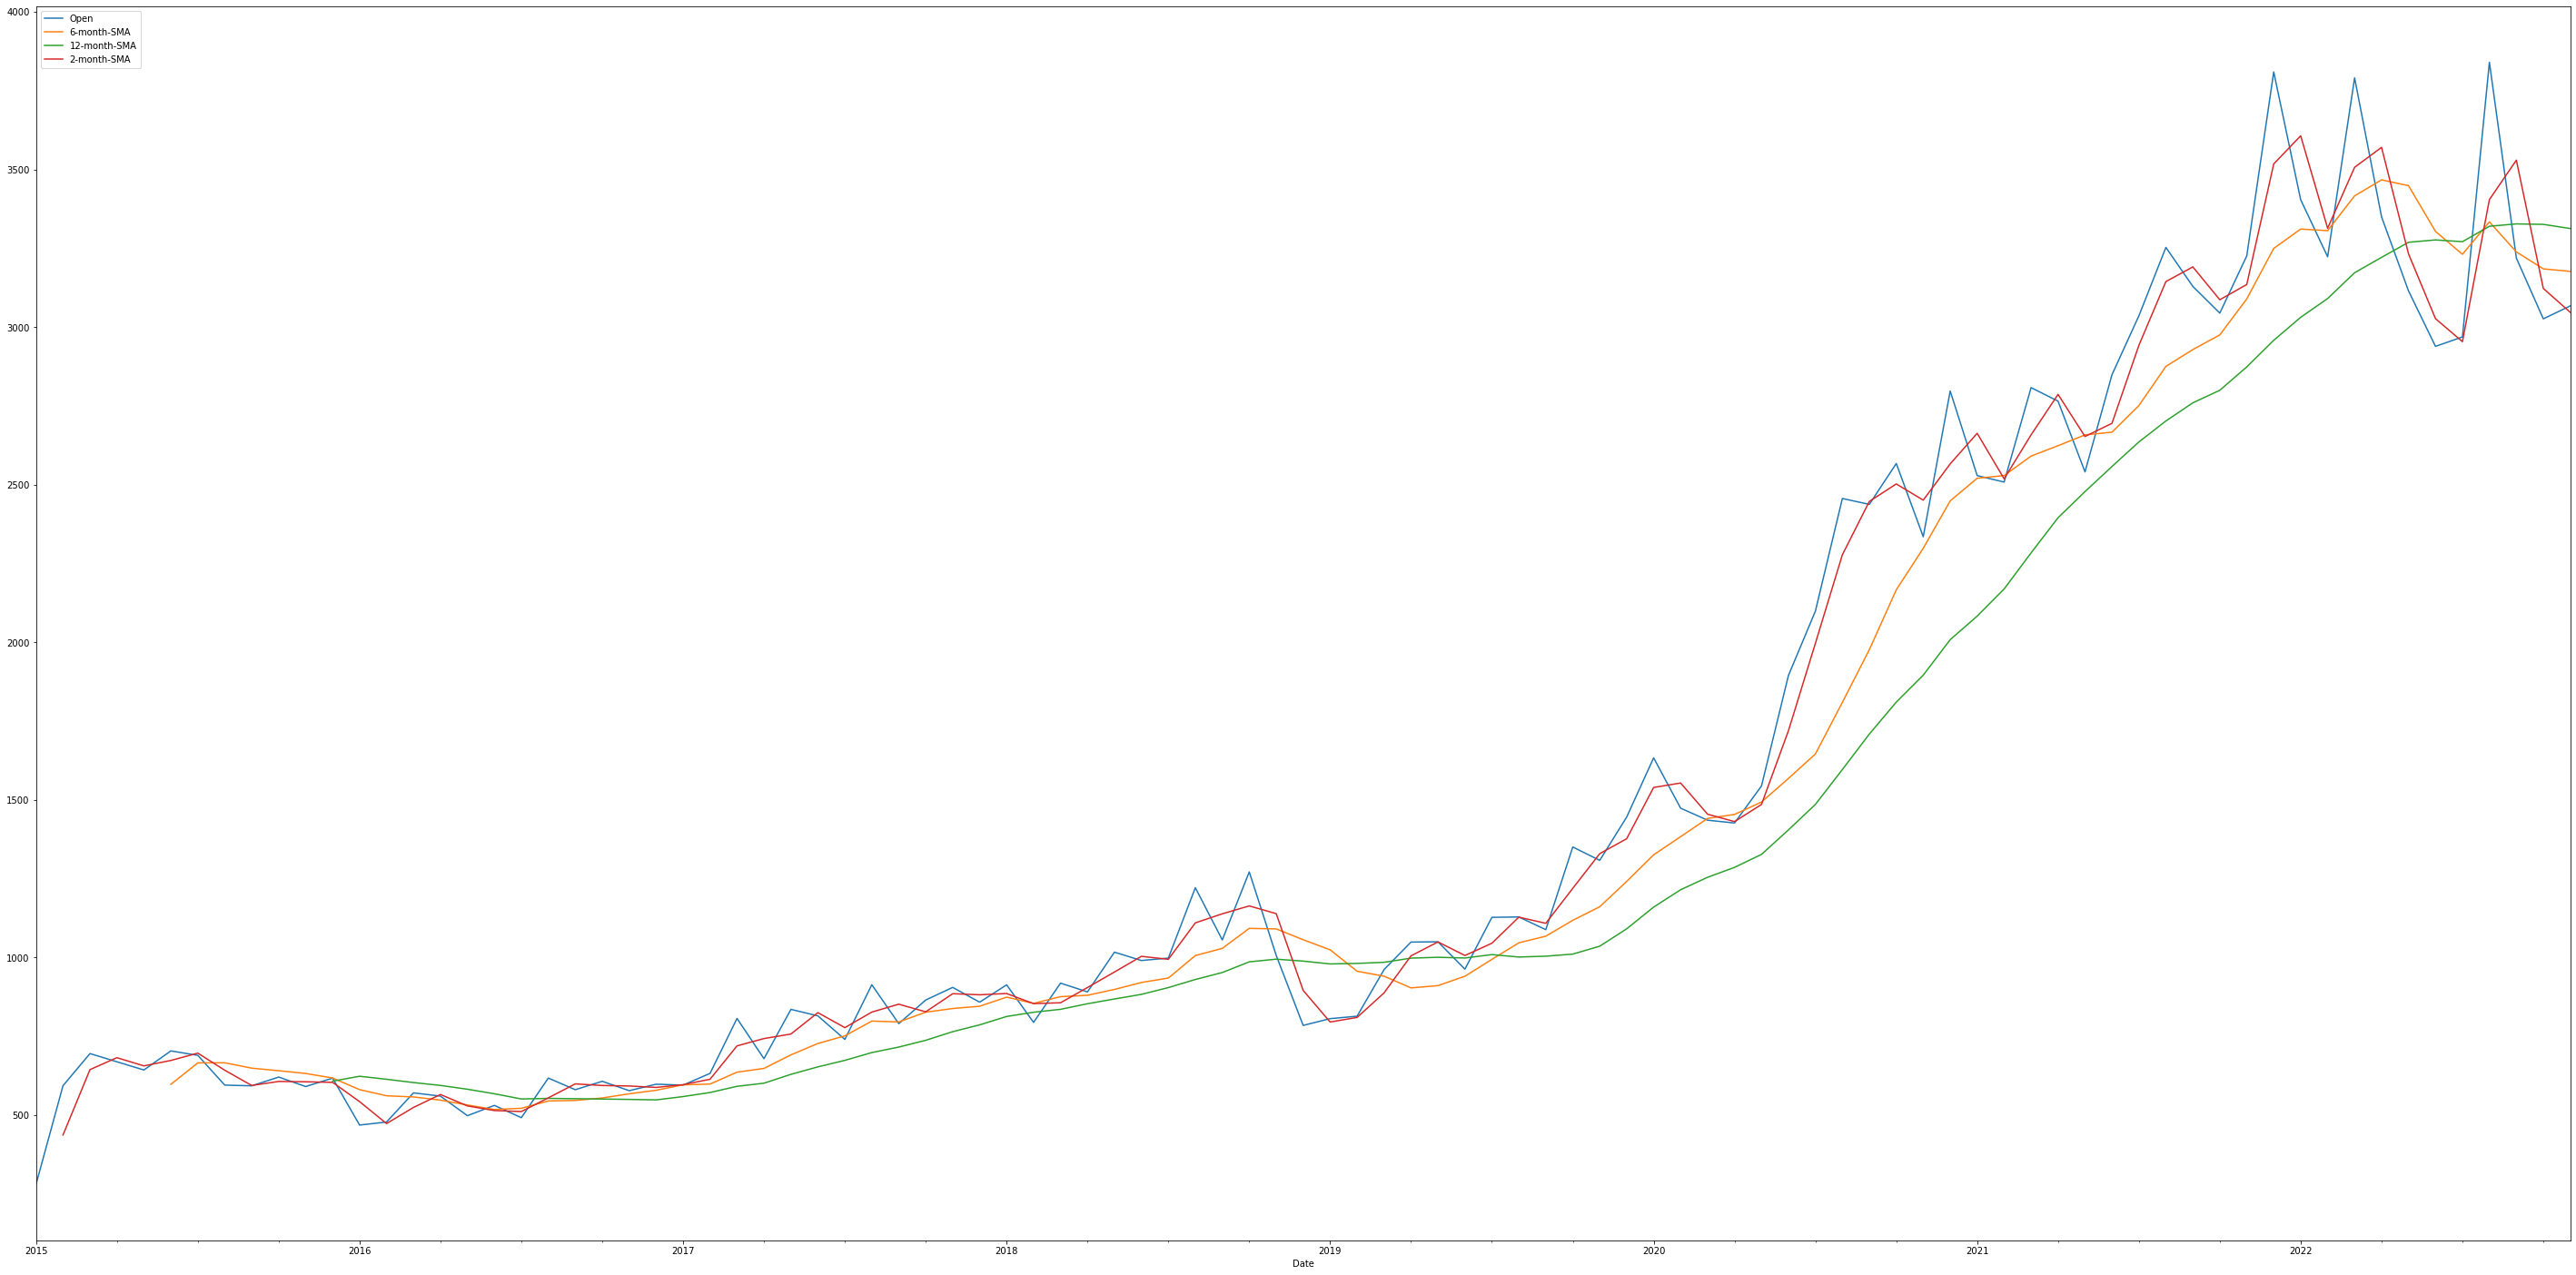

In [57]:
apple[["Open","6-month-SMA","12-month-SMA","2-month-SMA"]].plot(figsize=(50,25));

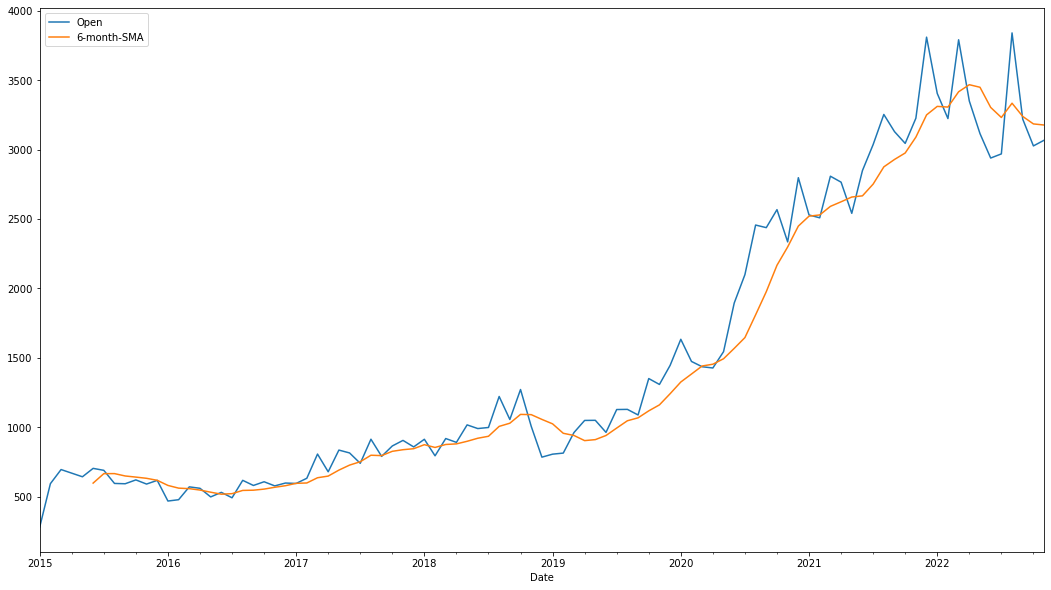

In [58]:
apple[["Open","6-month-SMA"]].plot(figsize=(18,10));

## Exponentially weighted moving average (EWMA) 

In [60]:
apple['EWMA12'] = apple['Open'].ewm(span=14,adjust=True).mean()

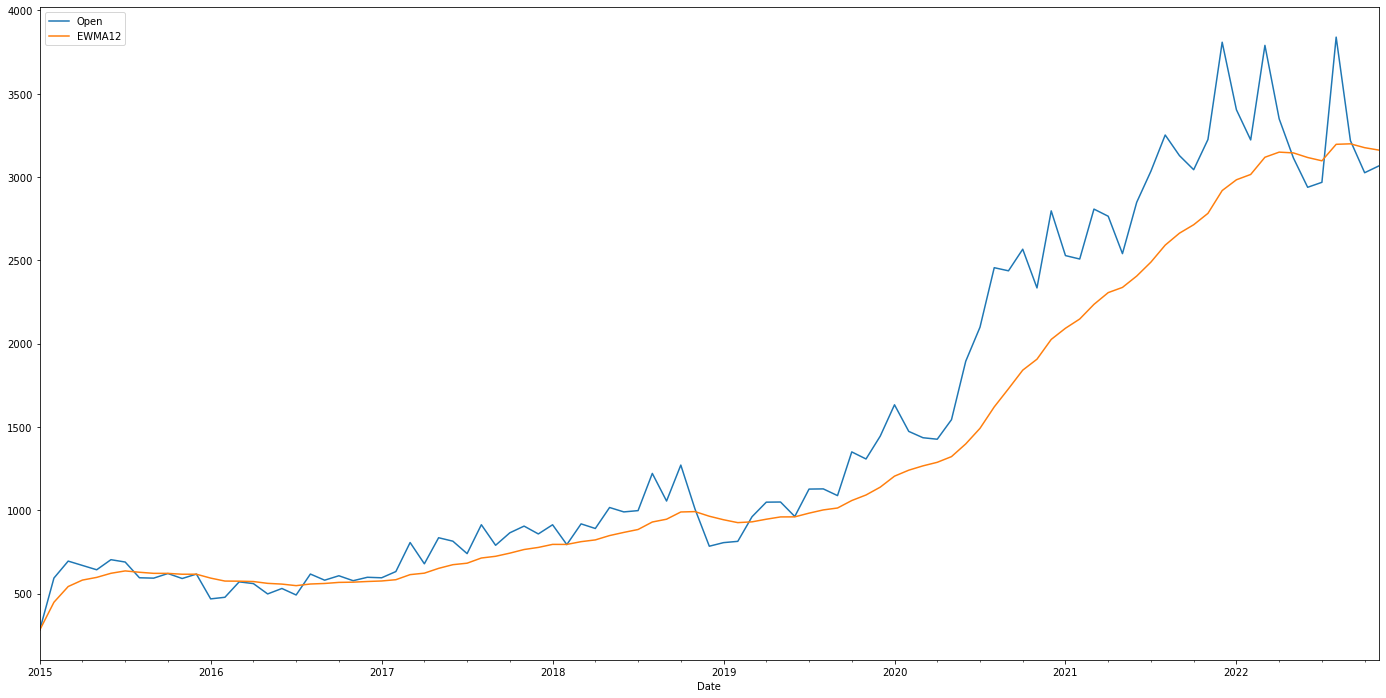

In [61]:
apple[['Open','EWMA12']].plot(figsize=(24,12));

## Data Manipulation

### Total potifolio value

In [63]:
apple['Total Pos'] = apple.sum(axis=1)

In [64]:
apple

Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   281.222498   284.495002   277.692497   280.812501   252.771870   
2015-02-01   593.862493   599.187507   589.147499   595.802496   538.108132   
2015-03-01   695.565004   700.899993   687.422504   692.839995   626.117579   
2015-04-01   669.560005   674.217497   662.680006   668.279998   603.922774   
2015-05-01   643.537505   648.855001   638.314999   643.807501   583.757447   
...                 ...          ...          ...          ...          ...   
2022-07-01  2968.729980  3015.319991  2942.830004  2993.409987  2984.307204   
2022-08-01  3840.000016  3877.560012  3807.279998  3838.360016  3831.098358   
2022-09-01  3218.969999  3261.480024  3168.759995  3213.059969  3207.738752   
2022-10-01  3026.220030  3082.810025  2992.089996  3045.279997  3040.236648   
2022-11-01  3067.199998  3108.689957  3013.669982  3062.709961  3061.990279   

                Volume  forecast_train  forecast_test  6-month-SMA  \
Date                                                                 
2015-01-01  2972372000        0.000000            NaN          NaN   
2015-02-01  4546140800      280.153241            NaN          NaN   
2015-03-01  4554568400      594.214846            NaN          NaN   
2015-04-01  3984542000      692.078472            NaN          NaN   
2015-05-01  3816608400      668.244020            NaN          NaN   
...                ...             ...            ...          ...   
2022-07-01  1447125400             NaN    3747.886478  3230.934993   
2022-08-01  1510239600             NaN    3977.163461  3333.756666   
2022-09-01  2084722800             NaN    3915.574106  3238.491669   
2022-10-01  1868139700             NaN    4089.948634  3184.598337   
2022-11-01  1724691200             NaN    3929.238544  3176.663337   

            12-month-SMA  2-month-SMA       EWMA12     Total Pos  
Date                                                              
2015-01-01           NaN          NaN   281.222498  2.972374e+09  
2015-02-01           NaN   437.542495   448.708210  4.546145e+09  
2015-03-01           NaN   644.713749   543.008343  4.554574e+09  
2015-04-01           NaN   682.562505   581.724066  3.984547e+09  
2015-05-01           NaN   656.548755   597.851098  3.816613e+09  
...                  ...          ...          ...           ...  
2022-07-01   3270.908331  2953.794990  3097.825289  1.447157e+09  
2022-08-01   3319.848332  3404.364998  3196.782109  1.510276e+09  
2022-09-01   3327.342498  3529.485007  3199.740499  2.084756e+09  
2022-10-01   3325.827501  3122.595014  3176.604403  1.868172e+09  
2022-11-01   3312.620833  3046.710014  3162.017131  1.724723e+09  

[95 rows x 13 columns]

In [65]:
apple['Total Pos'] = apple.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

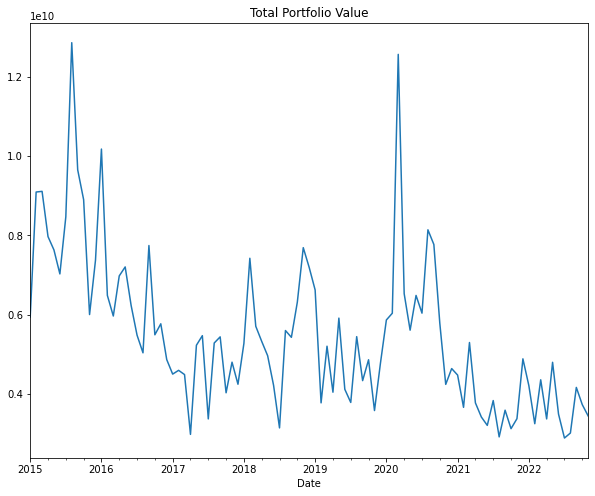

In [66]:
apple['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

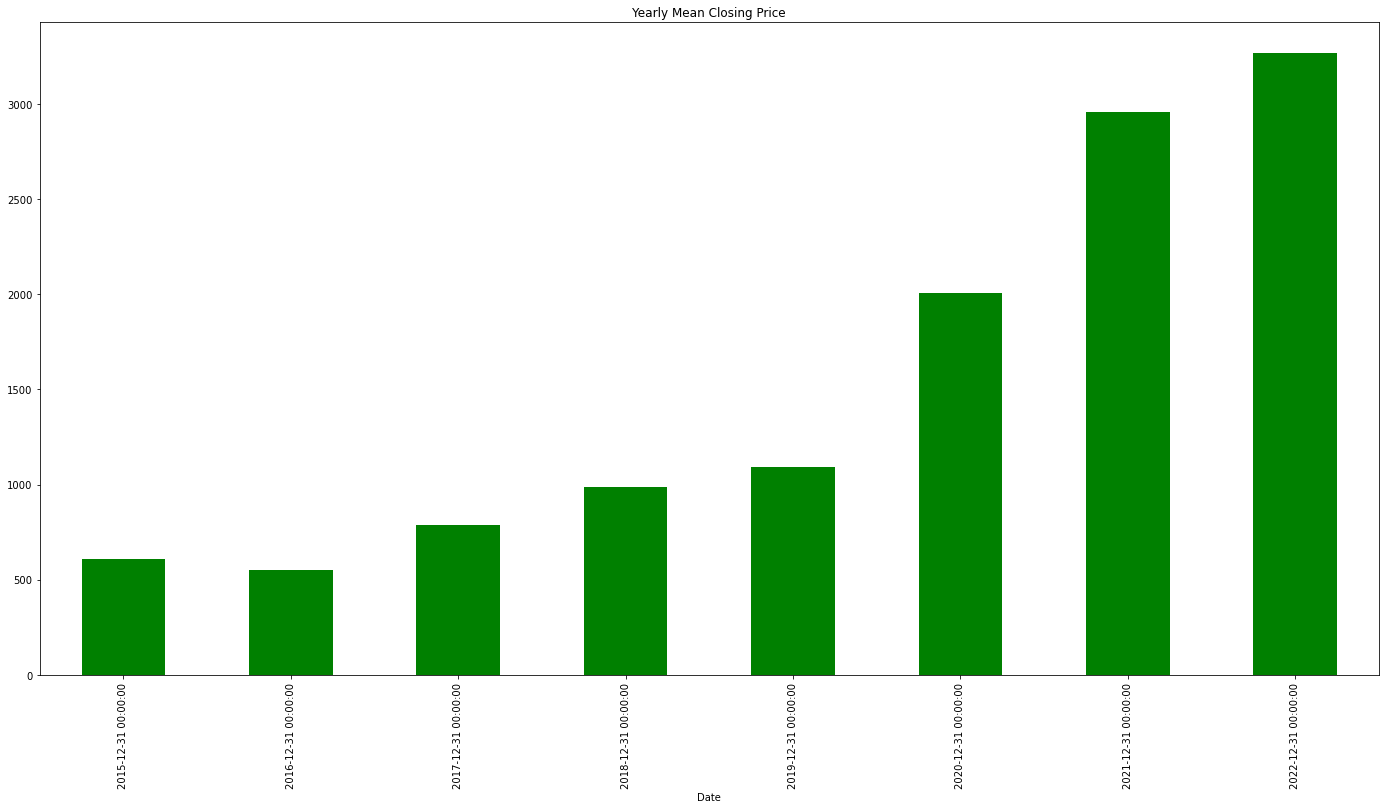

In [67]:
title = 'Yearly Mean Closing Price'
apple['Open'].resample('A').mean().plot.bar(title=title,color=['green'] , figsize=(24,12));

In [69]:
s1 = set([1,2,2,3,3,3])

s2 = set([3,3,3,4,4,4,4,5,5,5,5,5])

result = s1.union(s2)